In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import rfft,irfft
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
masterlist1=[['100', 100.0e6, 2.7e9, -5.0],['500', 500.0e6, 2.7e9, -5.0],['1000', 1000.0e6, 2.7e9, -5.0],
['1100', 1100.0e6, 2.7e9, -5.0],['1200', 1200.0e6, 2.7e9, -5.0],['1300', 1300.0e6, 2.7e9, -5.0],
['1350', 1350.0e6, 2.7e9, -5.0],['1400', 1400.0e6, 2.7e9, -5.0],['1500', 1500.0e6, 2.7e9, -5.0],
['1600', 1600.0e6, 2.7e9, -5.0]]

In [3]:
def call_behemoth(freq, nuX, dt, dbm):
    nu1=80.0e6
    nu2=1700.0e6
    output = np.fromfile("../../New Signal/" + freq + "MHz_5.0dBm.bin", 'u2')
    output=output*1.0-output.mean()
    fd=fft.rfft(output)
    dnu=1.0/((1/dt)*len(output))
    i1=int(nu1/dnu)
    i2=int(nu2/dnu)
    far=arange(i1,i2)*dnu
    fdz=fd[i1:i2]
    fdz=abs(fdz*fdz)
    nuM=far[fdz.argmax()]
    fdza=np.sqrt(fdz)
    fdzaa=output.var()
    input_power=10**dbm
    return (nuM/1e6), (nuM/nuX-1), (dnu/1e6)/int(freq), int(freq), fdzaa/input_power

def call_behemoth2(freq, nuX, dt, dbm):
    nu1=80.0e6
    nu2=1700.0e6
    output = np.fromfile("../../Signal Test/" + freq + "MHz_5.0dBm.bin", 'u2')
    output=output*1.0-output.mean()
    fd=fft.rfft(output)
    dnu=1.0/((1/dt)*len(output))
    i1=int(nu1/dnu)
    i2=int(nu2/dnu)
    far=arange(i1,i2)*dnu
    fdz=fd[i1:i2]
    fdz=abs(fdz*fdz)
    nuM=far[fdz.argmax()]
    fdza=np.sqrt(fdz)
    fdzaa=output.var()
    input_power=10**dbm
    return (nuM/1e6), (nuM/nuX-1), (dnu/1e6)/int(freq), int(freq), fdzaa/input_power

In [4]:
frequencies=[]
freqratio=[]
freqerror=[]
power=[]
for i,j,k,m in masterlist1:
    outputs=call_behemoth(i,j,k,m)
    frequencies.append(outputs[3])
    freqratio.append(outputs[1])
    freqerror.append(outputs[2])
    power.append(outputs[4])

In [5]:
frequencies2=[]
freqratio2=[]
freqerror2=[]
power2=[]
for i,j,k,m in masterlist1:
    outputs=call_behemoth2(i,j,k,m)
    frequencies2.append(outputs[3])
    freqratio2.append(outputs[1])
    freqerror2.append(outputs[2])
    power2.append(outputs[4])

<Container object of 3 artists>

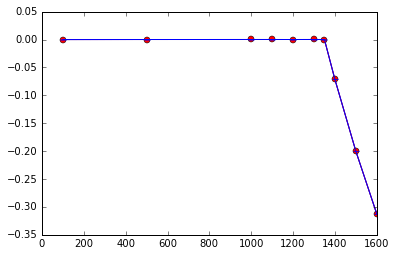

In [12]:
plot(frequencies, freqratio)
plot(frequencies2, freqratio2, 'ro-')
#ylim(-0.1, 0.1)
errorbar(frequencies,freqratio,fmt='b-',yerr=freqerror)

In [18]:
def call_low(freq, nuX, dt, dbm):
    nu1=80.0e6
    nu2=1700.0e6
    output = np.fromfile("../../New Signal/L" + freq + "MHz_5.0dBm.bin", 'u2')
    output=output*1.0-output.mean()
    fd=fft.rfft(output)
    dnu=1.0/((1/dt)*len(output))
    i1=int(nu1/dnu)
    i2=int(nu2/dnu)
    far=arange(i1,i2)*dnu
    fdz=fd[i1:i2]
    fdz=abs(fdz*fdz)
    nuM=far[fdz.argmax()]
    fdzaa=output.var()
    input_power=10**dbm
    return fdzaa/input_power

def call_low2(freq, nuX, dt, dbm):
    nu1=80.0e6
    nu2=1700.0e6
    output = np.fromfile("../../New Signal/L" + freq + "MHz_5.0dBm.bin", 'u2')
    output=output*1.0-output.mean()
    fd=fft.rfft(output)
    dnu=1.0/((1/dt)*len(output))
    i1=int(nu1/dnu)
    i2=int(nu2/dnu)
    far=arange(i1,i2)*dnu
    fdz=fd[i1:i2]
    fdz=abs(fdz*fdz)
    nuM=far[fdz.argmax()]
    fdzaa=output.var()
    input_power=10**dbm
    return fdzaa/input_power

In [19]:
lowpower=[]
for i,j,k,m in masterlist1:
    output=call_low(i,j,k,m)
    lowpower.append(output)

In [20]:
lowpower2=[]
for i,j,k,m in masterlist1:
    output=call_low(i,j,k,m)
    lowpower2.append(output)

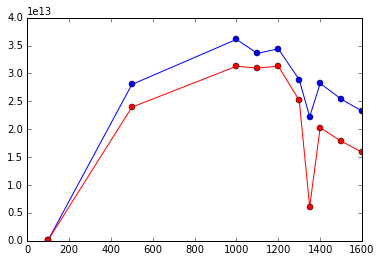

In [21]:
f2=np.array(frequencies)**1
plot(frequencies, power*f2,'bo-')
plot(frequencies, lowpower*f2,'ro-')

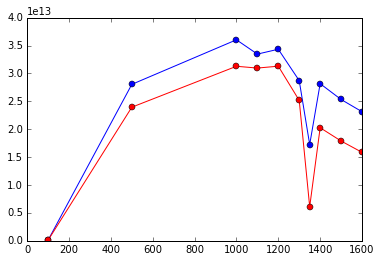

In [22]:
f3=np.array(frequencies2)**1
plot(frequencies2, power2*f2,'bo-')
plot(frequencies2, lowpower2*f2,'ro-')

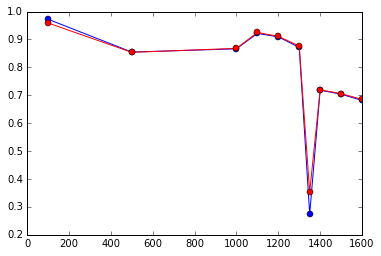

In [24]:
plot (frequencies,np.array(lowpower)/np.array(power),'bo-')
plot (frequencies,np.array(lowpower2)/np.array(power2),'ro-')

In [15]:
test=np.fromfile("../../New Signal/100MHz_5.0dBm.bin", 'u2')

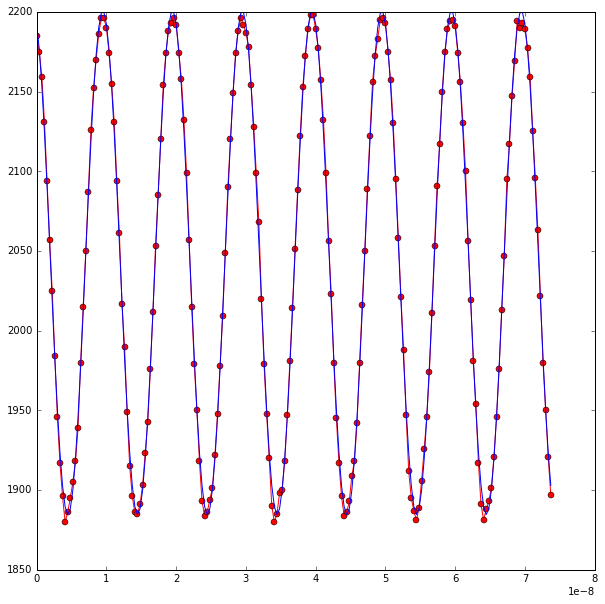

In [37]:
figure(figsize=(10,10))
dt=1/2.7e9
N=200
t=arange(N)*dt
plot (t,test[:N],'ro-')
plot (t,sin(100e6*t*2*np.pi+1.9)*158+test.mean())